In [27]:
import numpy as np

In [28]:
X1 = np.load("DATA.npy")
y1 = np.load("LABELS.npy")

In [29]:
X2 = np.load("DATA1.npy")
y2 = np.load("LABELS1.npy")

In [30]:
X3 = np.load("DATA2.npy")
y3 = np.load("LABELS2.npy")

In [31]:
X4 = np.load("DATA3.npy")
y4 = np.load("LABELS3.npy")

In [58]:
from sklearn.preprocessing import OneHotEncoder

X = np.concatenate((X2,X1,X4,X3))
words = np.concatenate((y2,y1,y4,y3))

top_100 = [ "again", "also", "ask", "because", "boy", "but", "can", "come", "deaf", "different", "drink", "drive", "eat", "email", "family", "feel", "few", "find", "fine", "fingerspell", "finish", "food", "for", "forget", "friend", "get", "girl", "give", "go", "good", "have", "here", "hearing", "hello", "help", "home", "how", "internet", "know", "later", "like", "small", "live", "man", "many", "me", "meet", "more", "my", "name", "need", "new", "no", "not", "now", "ok", "old", "other", "please", "remember", "same", "say", "school", "see", "she", "should", "sign", "slow", "some","sleep", "sorry", "store", "take", "tell", "text", "thank you", "their", "they", "think", "time", "tired", "try", "understand", "use", "wait", "want", "what", "when", "where", "which", "who", "why", "will", "with", "woman", "work", "write", "yes", "you", "your"]
top_3 = ['thank you','love','deaf',"hello","friend"]
letters = ['a', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k','m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w']
def get_instances(X,Y,words,letters):
    data = []
    data_words = []
    for i in range(len(X)):
        # print(Y[i])
        if (Y[i][0] in words):# or (Y[i] in letters)):
            data.append(X[i])
            data_words.append(Y[i][0])
    return np.array(data),np.array(data_words)

In [59]:
X_beta,words_beta = get_instances(X,words,top_3,letters)

In [60]:
Y_beta = OneHotEncoder().fit_transform(words_beta.reshape(-1,1)).toarray()

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test , y_train, y_test = train_test_split(X_beta, Y_beta, test_size=0.2, random_state=69,stratify = Y_beta)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import random

X_beta.shape,Y_beta.shape


((62, 60, 150), (62, 4))

In [48]:
def reset_random_seeds():
   tf.random.set_seed(69)
   np.random.seed(69)
   random.seed(69)

In [55]:
reset_random_seeds()


model = Sequential()
#input layer
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(60,150)))

#hidden layers
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


#output layer
model.add(Dense(Y_beta.shape[1], activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1000,validation_split = 0.2,verbose = 1)


Epoch 1/1000
2/2 [==============================] - 5s 581ms/step - loss: 1.3860 - accuracy: 0.2564 - val_loss: 1.3779 - val_accuracy: 0.5000
Epoch 2/1000
2/2 [==============================] - 0s 136ms/step - loss: 1.3835 - accuracy: 0.3333 - val_loss: 1.3745 - val_accuracy: 0.5000
Epoch 3/1000
2/2 [==============================] - 0s 126ms/step - loss: 1.3806 - accuracy: 0.3333 - val_loss: 1.3642 - val_accuracy: 0.5000
Epoch 4/1000
2/2 [==============================] - 0s 149ms/step - loss: 1.3774 - accuracy: 0.3333 - val_loss: 1.3452 - val_accuracy: 0.5000
Epoch 5/1000
2/2 [==============================] - 0s 148ms/step - loss: 1.3710 - accuracy: 0.3333 - val_loss: 1.3194 - val_accuracy: 0.5000
Epoch 6/1000
2/2 [==============================] - 0s 129ms/step - loss: 1.3739 - accuracy: 0.3333 - val_loss: 1.3483 - val_accuracy: 0.5000
Epoch 7/1000
2/2 [==============================] - 0s 144ms/step - loss: 1.3675 - accuracy: 0.3333 - val_loss: 1.3508 - val_accuracy: 0.5000
Epoch 

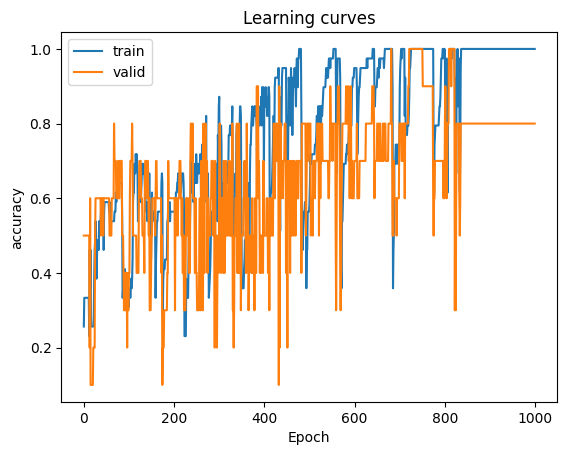

In [61]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [62]:
print("Accuracy on training data: {}".format(model.evaluate(X_train, y_train)))
print("Accuracy on test data: {}".format(model.evaluate(X_test, y_test)))


2/2 [==============================] - 0s 29ms/step - loss: 1.4784 - accuracy: 0.9592
Accuracy on training data: [1.4784103631973267, 0.9591836929321289]
1/1 [==============================] - 0s 46ms/step - loss: 1.4415 - accuracy: 0.9231
Accuracy on test data: [1.4414527416229248, 0.9230769276618958]
